<a href="https://colab.research.google.com/github/dfu2020/ATMS-597-SP-2020-Project-4/blob/master/Test_regression_0402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [0]:
#imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import datetime
import os
import glob

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#change to your directory where you stored the files
%cd /content/drive/My Drive/Project_4/

/content/drive/My Drive/Project_4


In [0]:
##!gunzip sfc.tar.gz

In [0]:
##!tar -xf sfc.tar

In [0]:
ls

bufkit/                            KCMI_daily_new.csv
daily/                             KCMI_daily_with_precip.csv
daily.tar                          KCMI_hourly.csv
daily.tar.gz                       KCMI_hourly_tidy.csv
GFS_daily_2010_2019.csv            prof.tar.gz
GFS_daily_2010_2019_test.csv       sfc.tar
GFS_Sfc_42hrFcst_2010thru2019.csv  someoutputfile.csv
KCMI_daily.csv                     surface/
KCMI_daily_format.csv


## Read GFS daily file

In [0]:
#to merge the daily tar files
path = "daily/"
all_files = glob.glob(path + "*.csv")
all_files.sort()

list = []
for i in np.arange(0,len(all_files)):
  GFS_daily_file = pd.read_csv(all_files[i], header=0)
  list.append(GFS_daily_file)
GFS_daily = pd.concat(list, axis=0)
GFS_daily_new = GFS_daily.set_axis(['Time','TMAX','TMIN','WMAX','RTOT'], 
                                   axis=1,inplace=False)
GFS_daily_new.set_index('Time',inplace=True)
 
#### THIS IS THE NEW CODE FASSTTTTTTTTT!@

In [0]:
GFS_daily_new

,TMAX,TMIN,WMAX,RTOT
Time,,,,
2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05
2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00
2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06
2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17
2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77
...,...,...,...,...
2020-01-27 12:00:00,0.84,-1.26,1.984943,0.29
2020-01-28 12:00:00,1.44,-2.56,2.319483,0.57
2020-01-29 12:00:00,2.34,-2.46,1.802776,0.00


In [0]:
GFS_daily_new.to_csv('GFS_daily_new.csv')

## Read GFS surface file

In [0]:
path = "surface/"
all_files = glob.glob(path + "*.csv")
all_files.sort()

GFS_array = []
for i in np.arange(0,len(all_files)):

  GFS_file_df = pd.read_csv(all_files[i], header=0)
  GFS_file_df = GFS_file_df.T
  GFS_array.append(GFS_file_df.iloc[1:9, :]) 
GFS_Sfc = pd.concat(GFS_array, axis=0)
GFS_Sfc.set_axis(['DWPC','HCLD','LCLD','MCLD','PRCP','PRES','TMPC','UWND',
                  'VWND','WSPD'], axis=1,inplace=True)
GFS_Sfc.rename_axis("Time",inplace=True)

In [0]:
path = "surface/"
all_files = glob.glob(path + "*.csv")
all_files.sort()

GFS_array = []
for i in np.arange(0,10):

  GFS_file_df = pd.read_csv(all_files[i], header=0)
  GFS_file_df = GFS_file_df.T
  GFS_file_df=GFS_file_df.replace(-9999.00, np.nan)
  GFS_array.append(GFS_file_df.iloc[1:, :].sum()) 

In [0]:
GFS_file_df.iloc[1:,:].sum()

0     -57.520000
1     503.000000
2     826.000000
3     488.000000
4       1.000000
5    8960.000000
6     -48.840000
7      32.300000
8     -16.800000
9      50.955407
dtype: float64

In [0]:
GFS_Sfc.to_csv('GFS_Sfc_new.csv')

In [0]:
GFS_Sfc_new = pd.read_csv('GFS_Sfc_new.csv', index_col='Time',parse_dates=True, infer_datetime_format=True)

In [0]:
GFS_Sfc_new.head(20)

,DWPC,HCLD,LCLD,MCLD,PRCP,PRES,TMPC,UWND,VWND,WSPD
Time,,,,,,,,,,
2010-01-02 06:00:00,-13.74,0.0,100.0,1.0,0.00,1000.0,-11.26,4.3,-5.4,6.902898
2010-01-02 09:00:00,-15.19,0.0,100.0,0.0,0.04,1000.4,-12.66,4.9,-5.3,7.218033
2010-01-02 12:00:00,-17.91,0.0,100.0,0.0,0.01,1000.7,-14.76,4.2,-6.0,7.323933
2010-01-02 15:00:00,-20.07,0.0,8.0,0.0,0.00,1002.0,-15.76,4.3,-4.5,6.224147
2010-01-02 18:00:00,-18.81,0.0,2.0,0.0,0.00,1001.3,-13.86,4.6,-4.0,6.095900
2010-01-02 21:00:00,-17.79,0.0,2.0,0.0,0.00,999.8,-13.36,3.6,-5.0,6.161169
2010-01-03 00:00:00,-18.55,0.0,2.0,0.0,0.00,1000.6,-15.26,2.1,-4.8,5.239275
2010-01-03 03:00:00,-19.36,0.0,4.0,0.0,0.00,1000.9,-16.06,2.1,-4.1,4.606517
2010-01-03 06:00:00,-18.27,0.0,0.0,0.0,0.00,1001.8,-15.36,1.5,-3.1,3.443835


In [0]:
GFS_Sfc_new=GFS_Sfc_new.replace(-9999.00, np.nan)
GFS_Sfc_new.head(20)

,DWPC,HCLD,LCLD,MCLD,PRCP,PRES,TMPC,UWND,VWND,WSPD
Time,,,,,,,,,,
2010-01-02 06:00:00,-13.74,0.0,100.0,1.0,0.00,1000.0,-11.26,4.3,-5.4,6.902898
2010-01-02 09:00:00,-15.19,0.0,100.0,0.0,0.04,1000.4,-12.66,4.9,-5.3,7.218033
2010-01-02 12:00:00,-17.91,0.0,100.0,0.0,0.01,1000.7,-14.76,4.2,-6.0,7.323933
2010-01-02 15:00:00,-20.07,0.0,8.0,0.0,0.00,1002.0,-15.76,4.3,-4.5,6.224147
2010-01-02 18:00:00,-18.81,0.0,2.0,0.0,0.00,1001.3,-13.86,4.6,-4.0,6.095900
2010-01-02 21:00:00,-17.79,0.0,2.0,0.0,0.00,999.8,-13.36,3.6,-5.0,6.161169
2010-01-03 00:00:00,-18.55,0.0,2.0,0.0,0.00,1000.6,-15.26,2.1,-4.8,5.239275
2010-01-03 03:00:00,-19.36,0.0,4.0,0.0,0.00,1000.9,-16.06,2.1,-4.1,4.606517
2010-01-03 06:00:00,-18.27,0.0,0.0,0.0,0.00,1001.8,-15.36,1.5,-3.1,3.443835


In [0]:
GFS_Sfc.index = pd.to_datetime(GFS_Sfc.index)  
#GFS_Sfc_daily =GFS_Sfc.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).max() #GET THE MAX FROM EACH DAY
GFS_Sfc_daily =GFS_Sfc.resample(rule='24H',closed='left',label='left',base=6).min() #

In [0]:
GFS_Sfc_daily

,DWPC,HCLD,LCLD,MCLD,PRCP,PRES,TMPC,UWND,VWND,WSPD
Time,,,,,,,,,,
2010-01-02 06:00:00,-20.07,0.0,2.0,0.0,0.0,999.8,-16.06,2.1,-6.0,4.606517
2010-01-03 06:00:00,-19.79,0.0,0.0,0.0,0.0,999.9,-16.46,1.5,-3.9,3.330165
2010-01-04 06:00:00,-16.84,0.0,4.0,0.0,0.0,996.8,-14.36,2.7,-4.3,4.420407
2010-01-05 06:00:00,-14.64,0.0,96.0,0.0,0.0,995.6,-12.86,2.8,-3.6,4.252058
2010-01-06 06:00:00,-13.25,0.0,1.0,0.0,0.0,992.5,-11.66,0.1,-2.2,0.141421
...,...,...,...,...,...,...,...,...,...,...
2020-01-29 06:00:00,-3.82,0.0,83.0,0.0,0.0,991.4,-2.36,-2.0,-1.8,1.220656
2020-01-30 06:00:00,-4.97,0.0,0.0,0.0,0.0,993.4,-2.36,-0.7,-1.2,0.781025
2020-01-31 06:00:00,-2.65,0.0,82.0,0.0,0.0,991.0,-0.86,-1.0,-0.6,0.989949


In [0]:
GFS_Sfc_daily_final = GFS_Sfc_daily[(GFS_Sfc_daily.index>'2009-12-31')&(GFS_Sfc_daily.index<'2020')]
GFS_Sfc_daily_final

,DWPC,HCLD,LCLD,MCLD,PRCP,PRES,TMPC,UWND,VWND,WSPD
Time,,,,,,,,,,
2010-01-02,-20.07,0.0,2.0,0.0,0.0,999.8,-16.06,2.1,-6.0,4.606517
2010-01-03,-19.79,0.0,0.0,0.0,0.0,999.9,-16.46,1.5,-3.9,3.330165
2010-01-04,-16.84,0.0,4.0,0.0,0.0,996.8,-14.36,2.7,-4.3,4.420407
2010-01-05,-14.64,0.0,96.0,0.0,0.0,995.6,-12.86,2.8,-3.6,4.252058
2010-01-06,-13.25,0.0,1.0,0.0,0.0,992.5,-11.66,0.1,-2.2,0.141421
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.22,0.0,0.0,0.0,0.0,990.6,4.54,-2.7,-2.4,0.921954
2019-12-28,0.94,0.0,0.0,0.0,0.0,983.5,3.64,-4.2,-0.2,2.308679
2019-12-29,8.28,33.0,0.0,80.0,0.0,972.3,10.44,-3.7,3.9,4.080441


In [0]:
GFS_Sfc_daily_final.to_csv('GFS_Sfc_daily_min.csv')

In [0]:
pwd

'/content/drive/My Drive/Project_4'

In [0]:
!tar -xf prof.tar

In [0]:
#to merge the gfs profile files
path = "profile/"
all_files = glob.glob(path + "*.csv")
all_files.sort()

list = []
for i in np.arange(0,len(all_files)):
  GFS_prof_file = pd.read_csv(all_files[i], header=0)
  list.append(GFS_prof_file.iloc[1:9, :])
GFS_prof = pd.concat(list, axis=0)
GFS_prof.set_axis(['Time','DWPC','HGHT','PRES','TMPC','UWND','VWND'],
                                   axis=1,inplace=True)
GFS_prof.set_index('Time',inplace=True)

In [0]:
GFS_prof.to_csv('GFS_profile_new.csv')

In [0]:
ls

 daily/                              KCMI_daily_format.csv
 daily.tar                           KCMI_daily_new.csv
 daily.tar.gz                        KCMI_daily_with_precip.csv
 GFS_daily_2010_2019.csv             KCMI_hourly.csv
 GFS_daily_2010_2019_test.csv        KCMI_hourly_tidy.csv
 GFS_daily_new.csv                   predictor_matrix.csv
 GFS_profile.csv                    'predictor_matrix_new|.csv'
 GFS_Sfc_42hrFcst_2010thru2019.csv   predictor_matrix_new.csv
 GFS_Sfc.csv                         profile/
 GFS_Sfc_daily_max.csv               prof.tar
 GFS_Sfc_daily_min.csv               sfc.tar
 GFS_Sfc_new.csv                     someoutputfile.csv
 KCMI_daily.csv                      surface/


In [0]:
GFS_prof = pd.read_csv('GFS_profile.csv', index_col='Time',parse_dates=True, infer_datetime_format=True)

In [0]:
GFS_prof.head(20)

,DWPC,HGHT,PRES,TMPC,UWND,VWND
Time,,,,,,
2010-01-02 06:00:00,"[-17.885416666666668, -22.15150234741784, -38....","[822.2693055555555, 1460.1033333333335, 2904.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-16.249583333333334, -16.52291079812207, -21....","[10.566530573750587, 4.214706046596407, 17.668...","[-21.60349159268254, -18.30022411700173, -29.5..."
2010-01-02 09:00:00,"[-19.453124999999996, -24.9388679245283, -42.0...","[822.0543749999998, 1459.7785849056602, 2907.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-17.247500000000002, -16.19490566037736, -20....","[13.681992680084207, 9.948942540840713, 19.953...","[-21.05132415236028, -17.798267800386434, -29...."
2010-01-02 12:00:00,"[-24.917708333333334, -29.536603773584904, -42...","[820.327638888889, 1459.582075471698, 2915.667...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-15.991249999999997, -15.280283018867925, -19...","[12.509088069631126, 14.999567192631927, 23.33...","[-25.372665670766228, -22.851012927878898, -32..."
2010-01-02 15:00:00,"[-29.030482758620682, -37.651971830985914, -43...","[826.2597241379308, 1463.5210798122066, 2927.6...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-18.595172413793104, -14.76, -16.487358490566...","[11.080763032604898, 13.737749044170894, 22.27...","[-20.65371472040801, -25.032875351390114, -38...."
2010-01-02 18:00:00,"[-24.84875862068967, -32.677452830188685, -41....","[823.4282758620693, 1458.4197169811318, 2927.1...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-19.58413793103448, -15.190188679245283, -15....","[11.173738737104433, 11.725204010079779, 25.07...","[-14.419104627678692, -22.850212323925128, -37..."
2010-01-02 21:00:00,"[-23.723541666666648, -31.231603773584904, -41...","[814.5235416666663, 1451.7584905660376, 2924.7...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-18.52666666666667, -14.439245283018868, -14....","[9.280847437628964, 13.398593774093092, 28.752...","[-16.548989694297227, -22.417731320168485, -37..."
2010-01-03 00:00:00,"[-27.292965517241385, -32.07079812206573, -41....","[818.8129655172417, 1456.3933333333334, 2930.5...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-17.499310344827585, -14.52056338028169, -14....","[3.511034750622741, 11.005251667788372, 30.469...","[-18.2430697535647, -23.400538147416142, -38.7..."
2010-01-03 03:00:00,"[-27.28510344827586, -33.31539906103286, -43.7...","[820.7152413793101, 1458.8048356807508, 2934.9...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-16.711724137931036, -14.65342723004695, -13....","[1.184391613594784, 6.8638483403032735, 24.840...","[-14.134740826662464, -19.89592389230682, -38...."
2010-01-03 06:00:00,"[-25.6275, -33.05830188679246, -45.49559748427...","[820.549166666667, 1458.3049056603775, 2932.43...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-16.143333333333334, -15.216603773584906, -13...","[-1.9754764134434684, 3.0071145961088406, 20.2...","[-8.494140743342218, -13.48674534777446, -32.1..."


In [0]:

# Find missing times
missing_prof_gfs = pd.date_range(start = '2010-01-02 06:00:00', end = '2020-02-02 06:00:00', freq='6H').difference(GFS_prof.index)
missing_prof_gfs

DatetimeIndex(['2010-01-02 06:00:00', '2010-01-02 12:00:00',
               '2010-01-02 18:00:00', '2010-01-03 00:00:00',
               '2010-01-03 06:00:00', '2010-01-03 12:00:00',
               '2010-01-03 18:00:00', '2010-01-04 00:00:00',
               '2010-01-04 06:00:00', '2010-01-04 12:00:00',
               ...
               '2020-01-31 00:00:00', '2020-01-31 06:00:00',
               '2020-01-31 12:00:00', '2020-01-31 18:00:00',
               '2020-02-01 00:00:00', '2020-02-01 06:00:00',
               '2020-02-01 12:00:00', '2020-02-01 18:00:00',
               '2020-02-02 00:00:00', '2020-02-02 06:00:00'],
              dtype='datetime64[ns]', length=14733, freq=None)

In [0]:
GFS_prof.to_csv('GFS_profile.csv')

In [0]:
|#to merge the daily tar files
path = "daily/"
all_files = glob.glob(path + "*.csv")
all_files.sort()

list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    list.append(df)

frame = pd.concat(list, axis=0, ignore_index=True)
frame

In [0]:
#rename columns.
frame.columns=['Time', 'TMAX', 'TMIN', 'WMAX', 'RTOT'] 

In [0]:
#save to csv.
frame.to_csv('GFS_daily_2010_2019_test.csv')

In [0]:
#!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/KCMI_daily.csv

In [0]:
#!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/KCMI_hourly.csv

In [0]:
!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/daily.tar.gz

--2020-03-28 03:48:05--  https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/daily.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138321 (135K) [application/octet-stream]
Saving to: ‘daily.tar.gz’

daily.tar.gz        100%[===================>] 135.08K  --.-KB/s    in 0.02s   

2020-03-28 03:48:05 (6.70 MB/s) - ‘daily.tar.gz’ saved [138321/138321]



In [0]:
!wget https://data.giss.nasa.gov/pub/rsp/field_experiments/CAMP2EX/Wcld_ict/CAMP2EX-RSP-WTRCLD_P3_20190908_R1.ict

--2020-04-03 21:19:54--  https://data.giss.nasa.gov/pub/rsp/field_experiments/CAMP2EX/Wcld_ict/CAMP2EX-RSP-WTRCLD_P3_20190908_R1.ict
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1194624 (1.1M)
Saving to: ‘CAMP2EX-RSP-WTRCLD_P3_20190908_R1.ict’

CAMP2EX-RSP-WTRCLD_ 100%[===================>]   1.14M  3.31MB/s    in 0.3s    

2020-04-03 21:19:54 (3.31 MB/s) - ‘CAMP2EX-RSP-WTRCLD_P3_20190908_R1.ict’ saved [1194624/1194624]



In [0]:
#!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/prof.tar.gz

In [0]:
#!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/sfc.tar.gz

## Read KCMI hourly Precip

In [0]:
#now read in the KCMI hourly data.
KCMI_hourly = pd.read_csv('KCMI_hourly.csv')  

KCMI_hourly_prec = KCMI_hourly[['pr1h']] #read in the hourly precip
KCMI_hourly_prec = KCMI_hourly_prec.set_index(KCMI_hourly['Timestamp'])  # copy the hourly timestamp
KCMI_hourly_prec.index = pd.to_datetime(KCMI_hourly_prec.index)  #change the index to datetime format

In [0]:
KCMI_hourly_prec = KCMI_hourly_prec.replace(-0.1, np.nan)   #replace the -0.1 with np.nan
KCMI_daily_prec = KCMI_hourly_prec.resample(rule='24H',closed='left',label='left',base=0).sum() #sum each day total precip

In [0]:
KCMI_daily_prec.columns=['precip_(mm)']  #rename column
KCMI_daily_prec_final = KCMI_daily_prec[(KCMI_daily_prec.index>'2009-12-31') & (KCMI_daily_prec.index<'2020')] #choose 2010-2019


In [0]:
KCMI_daily_prec_final

,precip_(mm)
Timestamp,
2010-01-01,0.0
2010-01-02,0.0
2010-01-03,0.0
2010-01-04,0.0
2010-01-05,0.0
...,...
2019-12-27,0.0
2019-12-28,2.8
2019-12-29,4.3


## Read KCMI Daily Observation

In [0]:
#read KCMI daily observations
KCMI_daily = pd.read_csv('KCMI_daily.csv', skiprows=8, parse_dates=True, index_col = 'Date')

In [0]:
KCMI_daily_new=KCMI_daily.iloc[:-7,:]   #ignore the footer
KCMI_daily_new

,Max Hourly Temp (F),Min Hourly Temp (F),Max Wind Speed (mph),Total Precip (in),Unnamed: 5
Date,,,,,
2010-01-01,12,2,15,M,NaN
2010-01-02,6,-5,15,0.00,NaN
2010-01-03,10,-6,11,0.00,NaN
2010-01-04,11,-2,20,0.00,NaN
2010-01-05,10,-1,16,M,NaN
...,...,...,...,...,...
2019-12-27,43,32,15,0.00,NaN
2019-12-28,56,32,23,0.23,NaN
2019-12-29,59,41,23,0.22,NaN


In [0]:
KCMI_daily_new=KCMI_daily_new.drop(['Unnamed: 5'],axis=1)    #remove the last column


In [0]:
#rename the columns
KCMI_daily_new.rename(columns={'Max Hourly Temp (F)': 'T_MAX(F)', 'Min Hourly Temp (F)': 'T_MIN(F)', 'Max Wind Speed (mph)': 'W_MAX(mph)', 'Total Precip (in)': 'R_TOT(in)'}, inplace = True)

In [0]:
KCMI_daily_new = KCMI_daily_new.drop('R_TOT(in)',axis=1)
KCMI_daily_new

,T_MAX(F),T_MIN(F),W_MAX(mph)
Date,,,
2010-01-01,12,2,15
2010-01-02,6,-5,15
2010-01-03,10,-6,11
2010-01-04,11,-2,20
2010-01-05,10,-1,16
...,...,...,...
2019-12-27,43,32,15
2019-12-28,56,32,23
2019-12-29,59,41,23


In [0]:
#add daily precipitation column from previous hourly processing
KCMI_daily_new['precip_(mm)'] = KCMI_daily_prec_final['precip_(mm)'].values

In [0]:
KCMI_daily_new

,T_MAX(F),T_MIN(F),W_MAX(mph),precip_(mm)
Date,,,,
2010-01-01,12,2,15,0.0
2010-01-02,6,-5,15,0.0
2010-01-03,10,-6,11,0.0
2010-01-04,11,-2,20,0.0
2010-01-05,10,-1,16,0.0
...,...,...,...,...
2019-12-27,43,32,15,0.0
2019-12-28,56,32,23,2.8
2019-12-29,59,41,23,4.3


In [0]:
#if you want to save the merged KCMI daily observations
KCMI_daily_new.to_csv('KCMI_daily_with_precip.csv')

In [0]:
KCMI_daily_new['T_MAX(F)']

Date
2010-01-01    12
2010-01-02     6
2010-01-03    10
2010-01-04    11
2010-01-05    10
              ..
2019-12-27    43
2019-12-28    56
2019-12-29    59
2019-12-30    38
2019-12-31    33
Name: T_MAX(F), Length: 3652, dtype: object

In [0]:
#now converting the units

#removing the Missing values
KCMI_daily_new=KCMI_daily_new.iloc[:,:].replace('M', np.nan)

# Convert TMAX,TMIN to Celcius, W_MAX to m/s
KCMI_daily_new['T_MAX(C)'] = (KCMI_daily_new['T_MAX(F)'].astype(float) - 32) * 5/9
KCMI_daily_new['T_MIN(C)'] = (KCMI_daily_new['T_MIN(F)'].astype(float)- 32) * 5/9
KCMI_daily_new['W_MAX(m/s)'] = KCMI_daily_new['W_MAX(mph)'].astype(float) * 0.44704
KCMI_daily_new['R_TOT(mm)'] = KCMI_daily_new['precip_(mm)']

KCMI_daily_final=KCMI_daily_new.iloc[:,4:]

In [0]:
KCMI_daily_final=KCMI_daily_new.iloc[:,4:]

In [0]:
#save the final daily KCMI observation csv
KCMI_daily_final.to_csv('KCMI_daily_format.csv')

,T_MAX(C),T_MIN(C),W_MAX(m/s),R_TOT(mm)
Date,,,,
2010-01-01,-11.111111,-16.666667,6.70560,0.0
2010-01-02,-14.444444,-20.555556,6.70560,0.0
2010-01-03,-12.222222,-21.111111,4.91744,0.0
2010-01-04,-11.666667,-18.888889,8.94080,0.0
2010-01-05,-12.222222,-18.333333,7.15264,0.0
...,...,...,...,...
2019-12-27,6.111111,0.000000,6.70560,0.0
2019-12-28,13.333333,0.000000,10.28192,2.8
2019-12-29,15.000000,5.000000,10.28192,4.3


## Read GFS Profile

In [0]:
GFS_profile = pd.read_csv('GFS_profile.csv', index_col='Time',parse_dates=True)

In [0]:
h=GFS_profile.TMPC.str.strip('[|]|,').values
list=[]
for i in range(0,len(GFS_profile)):
    e=h[i].split(',')[1]
    list.append(e)

GFS_profile['TMPC_850hPa']=list

In [0]:
GFS_profile_TMPC=GFS_profile.loc[:,['DWPC_925hPa','DWPC_850hPa','TMPC_925hPa','TMPC_850hPa']]
GFS_profile_TMPC

,DWPC_925hPa,DWPC_850hPa,TMPC_925hPa,TMPC_850hPa
Time,,,,
2010-01-02 06:00:00,-17.885416666666668,-22.15150234741784,-16.249583333333334,-16.52291079812207
2010-01-02 09:00:00,-19.453124999999996,-24.9388679245283,-17.247500000000002,-16.19490566037736
2010-01-02 12:00:00,-24.917708333333334,-29.536603773584904,-15.991249999999997,-15.280283018867925
2010-01-02 15:00:00,-29.030482758620682,-37.651971830985914,-18.595172413793104,-14.76
2010-01-02 18:00:00,-24.84875862068967,-32.677452830188685,-19.58413793103448,-15.190188679245283
...,...,...,...,...
2020-02-01 18:00:00,-2.420708661417323,-9.530575916230358,-2.2914960629921257,-2.228062827225135
2020-02-01 21:00:00,-2.7182608695652157,-14.782617801047117,-2.0765217391304316,-0.4961256544502628
2020-02-02 00:00:00,-2.8084210526315774,-24.81340314136124,-2.6178947368421035,1.2138219895287963


In [0]:
#GFS_Sfc.index = pd.to_datetime(GFS_Sfc.index)  
GFS_profile_daily =GFS_profile_TMPC.resample(rule='24H',closed='left',label='left',loffset='-6H',base=6).max() #GET THE MAX FROM EACH DAY
GFS_profile_daily

,DWPC_925hPa,DWPC_850hPa,TMPC_925hPa,TMPC_850hPa
Time,,,,
2010-01-02,-29.030482758620682,-37.651971830985914,-19.58413793103448,-16.52291079812207
2010-01-03,-28.16722222222222,-37.75211267605633,-16.143333333333334,-15.216603773584906
2010-01-04,-25.736666666666657,-28.88,-14.453023255813953,-11.718767772511848
2010-01-05,-16.81519379844961,-27.26137440758295,-13.232093023255818,-9.26
2010-01-06,-18.422790697674422,-33.553222748815166,-9.777829457364344,-9.276190476190477
...,...,...,...,...
2020-01-29,-6.662558139534886,-8.679146919431279,-5.618139534883722,-7.67800947867298
2020-01-30,-6.8455813953488365,-8.237109004739336,-4.973953488372093,-6.6012322274881505
2020-01-31,-5.017441860465118,-6.8905687203791475,-3.5724031007751957,-6.285592417061611


## Combine features

In [0]:
#read in GFS Daily
GFS_daily = pd.read_csv('GFS_daily_new.csv', index_col='Time',parse_dates=True) #read in previously merged GFS daily file
  #drop the unnamed column
GFS_daily_new = GFS_daily[(GFS_daily.index > '2009-12-31') & (GFS_daily.index < '2020-01-01')] #choose 2010-2019 data
GFS_daily_new.index = GFS_daily_new.index - pd.DateOffset(hours=12) 
GFS_daily_new

,TMAX,TMIN,WMAX,RTOT
Time,,,,
2010-01-01,-11.26,-16.46,7.323933,0.05
2010-01-02,-10.16,-15.96,4.687217,0.00
2010-01-03,-9.96,-14.36,5.941380,0.06
2010-01-04,-8.46,-12.86,5.685068,0.17
2010-01-05,-7.16,-11.06,3.794733,0.77
...,...,...,...,...
2019-12-27,13.94,3.54,8.819297,2.73
2019-12-28,15.94,9.34,9.701546,11.58
2019-12-29,7.24,-1.66,11.111256,2.57


In [0]:
#Read in KCMI Daily
KCMI_daily = pd.read_csv('KCMI_daily_format.csv', index_col = 'Date', parse_dates = True)
#KCMI_daily.index = KCMI_daily.index + pd.DateOffset(hours=12)  
KCMI_daily_new = KCMI_daily.rename_axis('Time')
KCMI_daily_new

,TMAX(C),TMIN(C),WMAX(M/s),PREC(mm)
Time,,,,
2010-01-01,-11.111111,-16.666667,6.70560,0.0
2010-01-02,-14.444444,-20.555556,6.70560,0.0
2010-01-03,-12.222222,-21.111111,4.91744,0.0
2010-01-04,-11.666667,-18.888889,8.94080,0.0
2010-01-05,-12.222222,-18.333333,7.15264,0.0
...,...,...,...,...
2019-12-27,6.111111,0.000000,6.70560,0.0
2019-12-28,13.333333,0.000000,10.28192,2.8
2019-12-29,15.000000,5.000000,10.28192,4.3


In [0]:
GFS_Sfc_max= pd.read_csv('GFS_Sfc_daily_max.csv', index_col = 'Time', parse_dates = True)
GFS_Sfc_max

,DWPC,HCLD,LCLD,MCLD,PRCP,PRES,TMPC,UWND,VWND,WSPD
Time,,,,,,,,,,
2010-01-02,-13.74,0.0,100.0,1.0,0.04,1002.0,-11.26,4.9,-4.0,7.323933
2010-01-03,-14.21,42.0,7.0,1.0,0.00,1001.8,-10.16,3.6,-2.5,4.687217
2010-01-04,-12.63,95.0,99.0,91.0,0.03,999.8,-9.96,4.4,-3.5,5.941380
2010-01-05,-10.75,97.0,101.0,96.0,0.03,997.3,-8.46,4.6,-2.7,5.685068
2010-01-06,-9.45,90.0,100.0,100.0,0.05,996.0,-7.16,3.6,0.1,3.794733
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,10.79,100.0,93.0,15.0,0.08,996.5,11.84,2.8,0.5,3.687818
2019-12-28,11.61,100.0,95.0,70.0,0.53,996.0,13.84,-2.3,6.6,7.823043
2019-12-29,14.23,100.0,100.0,100.0,9.70,980.3,15.64,3.0,8.7,8.796590


In [0]:
GFS_Sfc_min= pd.read_csv('GFS_Sfc_daily_min.csv', index_col = 'Time', parse_dates = True)
GFS_Sfc_min

,DWPC,HCLD,LCLD,MCLD,PRCP,PRES,TMPC,UWND,VWND,WSPD
Time,,,,,,,,,,
2010-01-02,-20.07,0.0,2.0,0.0,0.0,999.8,-16.06,2.1,-6.0,4.606517
2010-01-03,-19.79,0.0,0.0,0.0,0.0,999.9,-16.46,1.5,-3.9,3.330165
2010-01-04,-16.84,0.0,4.0,0.0,0.0,996.8,-14.36,2.7,-4.3,4.420407
2010-01-05,-14.64,0.0,96.0,0.0,0.0,995.6,-12.86,2.8,-3.6,4.252058
2010-01-06,-13.25,0.0,1.0,0.0,0.0,992.5,-11.66,0.1,-2.2,0.141421
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.22,0.0,0.0,0.0,0.0,990.6,4.54,-2.7,-2.4,0.921954
2019-12-28,0.94,0.0,0.0,0.0,0.0,983.5,3.64,-4.2,-0.2,2.308679
2019-12-29,8.28,33.0,0.0,80.0,0.0,972.3,10.44,-3.7,3.9,4.080441


In [0]:
#Read in KCMI Daily
KCMI_hourly = pd.read_csv('KCMI_hourly.csv', index_col = 'Timestamp', parse_dates = True)
KCMI_hourly
#KCMI_daily.index = KCMI_daily.index + pd.DateOffset(hours=12)  
KCMI_hourly_new = KCMI_hourly.rename_axis('Time')

KCMI_hourly_max = KCMI_hourly_new.resample(rule='24H',closed='left',label='left').max() #GET THE MAX FROM EACH DAY
KCMI_hourly_clean = KCMI_hourly_max.loc[:,['tmpc','dwpc','mslp','wdir','wspd','skct','pr1h']]
KCMI_hourly_clean

,tmpc,dwpc,mslp,wdir,wspd,skct,pr1h
Time,,,,,,,
2005-12-31,0.6,-1.7,1013.4,220.0,3.1,2.0,0.0
2006-01-01,10.0,8.3,1013.2,150.0,8.2,8.0,0.0
2006-01-02,16.1,14.4,1006.3,310.0,8.2,9.0,2.3
2006-01-03,6.1,5.6,1015.6,350.0,7.7,8.0,0.3
2006-01-04,6.1,5.0,1015.5,300.0,10.3,8.0,0.0
...,...,...,...,...,...,...,...
2020-03-05,13.3,1.7,1020.2,310.0,12.4,0.0,0.0
2020-03-06,6.1,-1.1,1034.1,360.0,12.4,0.0,0.0
2020-03-07,11.1,-2.2,1036.2,190.0,7.7,0.0,0.0


In [0]:
predictor_matrix=[]
predictor_matrix = KCMI_daily_new.merge(GFS_daily_new, left_index=True, right_index=True)
predictor_matrix = predictor_matrix.merge(GFS_Sfc_max, left_index=True, right_index=True)
predictor_matrix = predictor_matrix.merge(GFS_profile_daily, left_index=True, right_index=True)
predictor_matrix = predictor_matrix.merge(KCMI_hourly_clean, left_index=True, right_index=True)

In [0]:
#get the difference betweeen model and observation
predictor_matrix['delta_TMAX']= predictor_matrix['TMAX']-predictor_matrix['TMAX(C)']
predictor_matrix['delta_TMIN']= predictor_matrix['TMIN']-predictor_matrix['TMIN(C)']
predictor_matrix['delta_WMAX']= predictor_matrix['WMAX']-predictor_matrix['WMAX(M/s)']
predictor_matrix['delta_PREC']= predictor_matrix['RTOT']-predictor_matrix['PREC(mm)']


In [0]:
predictor_matrix['year']=predictor_matrix.index.year

In [0]:
predictor_matrix['DWPC_925hPa'] = predictor_matrix['DWPC_925hPa'].astype(float)
predictor_matrix['DWPC_850hPa'] = predictor_matrix['DWPC_850hPa'].astype(float)
predictor_matrix['TMPC_925hPa'] = predictor_matrix['TMPC_925hPa'].astype(float)
predictor_matrix['TMPC_850hPa'] = predictor_matrix['TMPC_850hPa'].astype(float)

In [0]:
predictor_matrix

,TMAX(C),TMIN(C),WMAX(M/s),PREC(mm),TMAX,TMIN,WMAX,RTOT,DWPC,HCLD,LCLD,MCLD,PRCP,PRES,TMPC,UWND,VWND,WSPD,DWPC_925hPa,DWPC_850hPa,TMPC_925hPa,TMPC_850hPa,tmpc,dwpc,mslp,wdir,wspd,skct,pr1h,delta_TMAX,delta_TMIN,delta_WMAX,delta_PREC,year
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-02,-14.444444,-20.555556,6.70560,0.0,-10.16,-15.96,4.687217,0.00,-13.74,0.0,100.0,1.0,0.04,1002.0,-11.26,4.9,-4.0,7.323933,-29.030483,-37.651972,-19.584138,-16.522911,-14.4,-17.8,1034.4,340.0,6.7,0.0,0.0,4.284444,4.595556,-2.018383,0.00,2010
2010-01-03,-12.222222,-21.111111,4.91744,0.0,-9.96,-14.36,5.941380,0.06,-14.21,42.0,7.0,1.0,0.00,1001.8,-10.16,3.6,-2.5,4.687217,-28.167222,-37.752113,-16.143333,-15.216604,-12.2,-17.2,1033.0,350.0,5.1,2.0,0.0,2.262222,6.751111,1.023940,0.06,2010
2010-01-04,-11.666667,-18.888889,8.94080,0.0,-8.46,-12.86,5.685068,0.17,-12.63,95.0,99.0,91.0,0.03,999.8,-9.96,4.4,-3.5,5.941380,-25.736667,-28.880000,-14.453023,-11.718768,-11.7,-15.6,1030.2,310.0,8.8,8.0,0.0,3.206667,6.028889,-3.255732,0.17,2010
2010-01-05,-12.222222,-18.333333,7.15264,0.0,-7.16,-11.06,3.794733,0.77,-10.75,97.0,101.0,96.0,0.03,997.3,-8.46,4.6,-2.7,5.685068,-16.815194,-27.261374,-13.232093,-9.260000,-12.2,-15.6,1027.6,290.0,7.2,8.0,0.0,5.062222,7.273333,-3.357907,0.77,2010
2010-01-06,-7.777778,-19.444444,3.57632,1.5,-5.46,-7.46,9.548298,7.10,-9.45,90.0,100.0,100.0,0.05,996.0,-7.16,3.6,0.1,3.794733,-18.422791,-33.553223,-9.777829,-9.276190,-8.0,-10.6,1027.2,290.0,3.6,9.0,1.0,2.317778,11.984444,5.971978,5.60,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,6.111111,0.000000,6.70560,0.0,13.94,3.54,8.819297,2.73,10.79,100.0,93.0,15.0,0.08,996.5,11.84,2.8,0.5,3.687818,8.583023,1.629143,9.119687,7.540476,7.8,6.7,1026.7,350.0,6.7,2.0,0.0,7.828889,3.540000,2.113697,2.73,2019
2019-12-28,13.333333,0.000000,10.28192,2.8,15.94,9.34,9.701546,11.58,11.61,100.0,95.0,70.0,0.53,996.0,13.84,-2.3,6.6,7.823043,9.841719,9.703947,9.907187,9.919474,13.3,12.2,1023.9,130.0,8.2,9.0,2.5,2.606667,9.340000,-0.580374,8.78,2019
2019-12-29,15.000000,5.000000,10.28192,4.3,7.24,-1.66,11.111256,2.57,14.23,100.0,100.0,100.0,9.70,980.3,15.64,3.0,8.7,8.796590,7.834851,9.588571,7.784000,9.841587,15.0,14.4,1006.0,200.0,10.8,4.0,1.5,-7.760000,-6.660000,0.829336,-1.73,2019


In [0]:
predictor_matrix = predictor_matrix.dropna()

In [0]:
predictor_matrix.to_csv('predictor_matrix_new.csv')

In [0]:
predictor_matrix=pd.read_csv('predictor_matrix_new.csv',index_col = 'Time', parse_dates = True)
#df = df.apply(pd.to_numeric, errors='coerce')
predictor_matrix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3427 entries, 2010-01-02 to 2019-12-29
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TMAX(C)      3427 non-null   float64
 1   TMIN(C)      3427 non-null   float64
 2   WMAX(M/s)    3427 non-null   float64
 3   PREC(mm)     3427 non-null   float64
 4   TMAX         3427 non-null   float64
 5   TMIN         3427 non-null   float64
 6   WMAX         3427 non-null   float64
 7   RTOT         3427 non-null   float64
 8   DWPC         3427 non-null   float64
 9   HCLD         3427 non-null   float64
 10  LCLD         3427 non-null   float64
 11  MCLD         3427 non-null   float64
 12  PRCP         3427 non-null   float64
 13  PRES         3427 non-null   float64
 14  TMPC         3427 non-null   float64
 15  UWND         3427 non-null   float64
 16  VWND         3427 non-null   float64
 17  WSPD         3427 non-null   float64
 18  DWPC_925hPa  3427 non-null   f

##TMAX_multiple_linear_regression

In [0]:
#check the correlation between different features.
predictor_matrix.corr()[['TMAX(C)']]

,TMAX(C)
TMAX(C),1.000000
TMIN(C),0.945441
WMAX(M/s),-0.239969
PREC(mm),0.094314
TMAX,0.933957
TMIN,0.931184
WMAX,-0.271869
RTOT,0.130153
DWPC,0.933606
HCLD,0.106578


In [0]:
predictors = ['TMAX', 'TMIN', 'WMAX','RTOT','DWPC','HCLD','LCLD','MCLD','PRES','TMPC','DWPC_925hPa','DWPC_850hPa','TMPC_925hPa','TMPC_850hPa','UWND','VWND','WSPD','delta_TMIN'] 
#predictors = ['tmpc'] 
new_features = predictor_matrix[['TMAX(C)']+ predictors + ['year']] #the only reason we are keeping the years is for sample splitting purposes
# separate our my predictor variables (X) from my outcome variable y
X = new_features[predictors]
y = new_features['TMAX(C)']

X_train = new_features[new_features['year']< 2019][predictors]
X_test = new_features[new_features['year']== 2019][predictors]
y_train = new_features[new_features['year']< 2019]['TMAX(C)']
y_test = new_features[new_features['year']== 2019]['TMAX(C)']

regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, prediction)))

The Explained Variance: 0.97
The Mean Absolute Error: 1.48 degrees celsius
The Median Absolute Error: 1.21 degrees celsius
The Root Mean Square Error: 1.90 degrees celsius 


In [0]:
# separate our my predictor variables (X) from my outcome variable y
X = new_features[predictors]
y = new_features['TMAX(C)']

# Add a constant to the predictor variable set to represent the Bo intercept
#X = sm.add_constant(X)
#X.ix[:5, :5]

In [0]:
X_train = new_features[new_features['year']< 2019][predictors]
X_test = new_features[new_features['year']== 2019][predictors]
y_train = new_features[new_features['year']< 2019]['TMAX(C)']
y_test = new_features[new_features['year']== 2019]['TMAX(C)']


In [0]:
y_train.shape

(3208,)

In [0]:
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, prediction)))

The Explained Variance: 0.97
The Mean Absolute Error: 1.53 degrees celsius
The Median Absolute Error: 1.19 degrees celsius
The Root Mean Square Error: 1.97 degrees celsius 


In [0]:
print("Model slope:    ", regressor.coef_[0])
print("Model intercept:", regressor.intercept_)

Model slope:     0.06073055298415657
Model intercept: 23.86791595776547


In [0]:
predictor_matrix.index.values

array(['2010-01-02T00:00:00.000000000', '2010-01-03T00:00:00.000000000',
       '2010-01-04T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

##Linear_Regression

In [0]:
time = predictor_matrix.index.values

In [0]:
time = predictor_matrix.index[predictor_matrix.index.year==2019].values

In [0]:
time.size

363

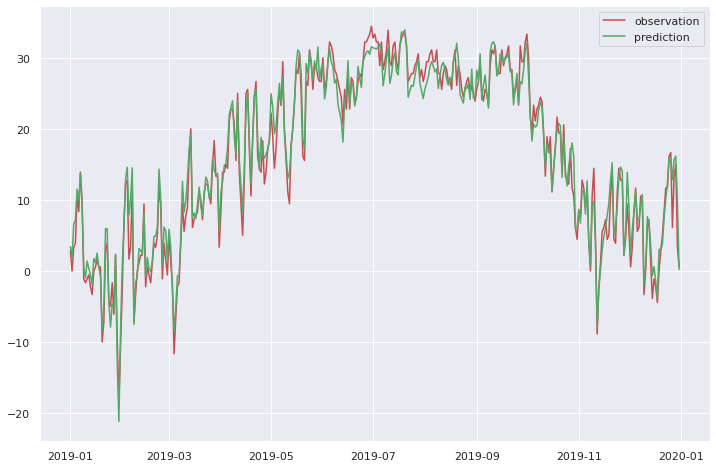

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(time,y_test,c='r',label='observation')
plt.plot(time,prediction, c='g',label='prediction')
plt.legend()
plt.show()

In [0]:
#check the correlation between different features.
predictor_matrix.corr()[['TMIN(C)']]

,TMIN(C)
TMAX(C),0.945460
TMIN(C),1.000000
WMAX(M/s),-0.241778
PREC(mm),0.161947
TMAX,0.913724
TMIN,0.928560
WMAX,-0.277016
RTOT,0.158635
DWPC,0.968688
HCLD,0.138133


In [0]:
####
predictors = ['TMAX', 'TMIN', 'WMAX','RTOT','DWPC','HCLD','LCLD','MCLD','PRES','TMPC','DWPC_925hPa','DWPC_850hPa','TMPC_925hPa','TMPC_850hPa','UWND','VWND','WSPD'] 
#predictors = ['TMAX', 'TMIN', 'WMAX','RTOT','DWPC','PRES','TMPC','DWPC_925hPa','TMPC_925hPa'] 
new_features = predictor_matrix[['TMIN(C)']+ predictors + ['year']] #the only reason we are keeping the years is for sample splitting purposes
X = new_features[predictors]
y = new_features['TMIN(C)']

X_train = new_features[new_features['year']< 2019][predictors]
X_test = new_features[new_features['year']== 2019][predictors]
y_train = new_features[new_features['year']< 2019]['TMIN(C)']
y_test = new_features[new_features['year']== 2019]['TMIN(C)']

regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f degrees celsius " %  sqrt(mean_squared_error(y_test, prediction)))

The Explained Variance: 0.97
The Mean Absolute Error: 1.44 degrees celsius
The Median Absolute Error: 1.14 degrees celsius
The Root Mean Square Error: 1.82 degrees celsius 


In [0]:
predictor_matrix.corr()[['WMAX(M/s)']]

,WMAX(M/s)
TMAX(C),-0.240180
TMIN(C),-0.241778
WMAX(M/s),1.000000
PREC(mm),0.143217
TMAX,-0.343595
TMIN,-0.329469
WMAX,0.428981
RTOT,0.046047
DWPC,-0.260437
HCLD,0.087584


In [0]:
####
predictors = ['TMAX', 'TMIN', 'WMAX','RTOT','DWPC','HCLD','LCLD','MCLD','PRES','TMPC','DWPC_925hPa','TMPC_925hPa','DWPC_850hPa','TMPC_850hPa','UWND','VWND','WSPD'] 
new_features = predictor_matrix[['WMAX(M/s)']+ predictors + ['year']] #the only reason we are keeping the years is for sample splitting purposes
X = new_features[predictors]
y = new_features['WMAX(M/s)']

X_train = new_features[new_features['year']< 2019][predictors]
X_test = new_features[new_features['year']== 2019][predictors]
y_train = new_features[new_features['year']< 2019]['WMAX(M/s)']
y_test = new_features[new_features['year']== 2019]['WMAX(M/s)']

regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f m/s" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f m/s" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f m/s " %  sqrt(mean_squared_error(y_test, prediction)))


The Explained Variance: 0.71
The Mean Absolute Error: 1.27 m/s
The Median Absolute Error: 1.03 m/s
The Root Mean Square Error: 1.63 m/s 


In [0]:
predictor_matrix.corr()[['PREC(mm)']]

,PREC(mm)
TMAX(C),0.085265
TMIN(C),0.157351
WMAX(M/s),0.155570
PREC(mm),1.000000
TMAX,0.057209
TMIN,0.083104
WMAX,0.113978
RTOT,0.113366
DWPC,0.193051
HCLD,0.234256


In [0]:
predictors = ['TMAX', 'TMIN', 'WMAX','RTOT','DWPC','LCLD','PRES','PRCP','DWPC_925hPa','UWND','VWND','WSPD','delta_TMAX','delta_WMAX'] 
new_features = predictor_matrix[['PREC(mm)']+ predictors + ['year']] #the only reason we are keeping the years is for sample splitting purposes
X = new_features[predictors]
y = new_features['PREC(mm)']

X_train = new_features[new_features['year']< 2019][predictors]
X_test = new_features[new_features['year']== 2019][predictors]
y_train = new_features[new_features['year']< 2019]['PREC(mm)']
y_test = new_features[new_features['year']== 2019]['PREC(mm)']

regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f mm" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f mm" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f mm " %  sqrt(mean_squared_error(y_test, prediction)))


The Explained Variance: 0.38
The Mean Absolute Error: 2.19 mm
The Median Absolute Error: 1.26 mm
The Root Mean Square Error: 3.68 mm 


##RANDOMFOREST

In [0]:
predictors = ['TMAX', 'TMIN', 'WMAX','RTOT','DWPC','HCLD','LCLD','MCLD','PRES','TMPC','DWPC_925hPa','TMPC_925hPa','DWPC_850hPa','TMPC_850hPa','UWND','VWND','WSPD'] 
new_features = predictor_matrix[['WMAX(M/s)']+ predictors + ['year']] #the only reason we are keeping the years is for sample splitting purposes
X = new_features[predictors]
y = new_features['WMAX(M/s)']

X_train = new_features[new_features['year']< 2019][predictors]
X_test = new_features[new_features['year']== 2019][predictors]
y_train = new_features[new_features['year']< 2019]['WMAX(M/s)']
y_test = new_features[new_features['year']== 2019]['WMAX(M/s)']

from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, max_depth = 2, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train);

prediction = rf.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
#print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f m/s" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f m/s" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f m/s " %  sqrt(mean_squared_error(y_test, prediction)))


The Mean Absolute Error: 1.38 m/s
The Median Absolute Error: 1.10 m/s
The Root Mean Square Error: 1.78 m/s 


In [0]:
#predictors = ['TMAX', 'TMIN', 'WMAX','RTOT','DWPC','LCLD','PRES','PRCP','DWPC_925hPa','UWND','VWND','WSPD','delta_TMAX','delta_WMAX'] 
predictors = ['RTOT','PRCP'] 
new_features = predictor_matrix[['PREC(mm)']+ predictors + ['year']] #the only reason we are keeping the years is for sample splitting purposes
X = new_features[predictors]
y = new_features['PREC(mm)']

X_train = new_features[new_features['year']< 2019][predictors]
X_test = new_features[new_features['year']== 2019][predictors]
y_train = new_features[new_features['year']< 2019]['PREC(mm)']
y_test = new_features[new_features['year']== 2019]['PREC(mm)']


# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, max_depth = 2, random_state = 50)

# Train the model on training data
rf.fit(X_train, y_train);

prediction = rf.predict(X_test)

# Print out the root mean square error (rmse)


# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
#print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f mm" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f mm" % median_absolute_error(y_test, prediction))
print("The Root Mean Square Error: %.2f mm " %  sqrt(mean_squared_error(y_test, prediction)))


The Mean Absolute Error: 1.96 mm
The Median Absolute Error: 0.25 mm
The Root Mean Square Error: 3.77 mm 
